<a href="https://colab.research.google.com/github/santhiravuri/generative-ai-internship/blob/main/day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 359ms/step - loss: 0.2242 - val_loss: 0.0897
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 348ms/step - loss: 0.1135 - val_loss: 0.0842
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 169s 360ms/step - loss: 0.1067 - val_loss: 0.0817
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 349ms/step - loss: 0.1039 - val_loss: 0.0797
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 342ms/step - loss: 0.1016 - val_loss: 0.0792
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 156s 332ms/step - loss: 0.1001 - val_loss: 0.0787
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 337ms/step - loss: 0.0993 - val_loss: 0.0777
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 330ms/step - loss: 0.0984 - val_loss: 0.0775
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 160s 341ms/step - loss: 0.0978 - val_loss: 0.0768
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 330ms/step - loss: 0.0973 - val_loss: 0.0768
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


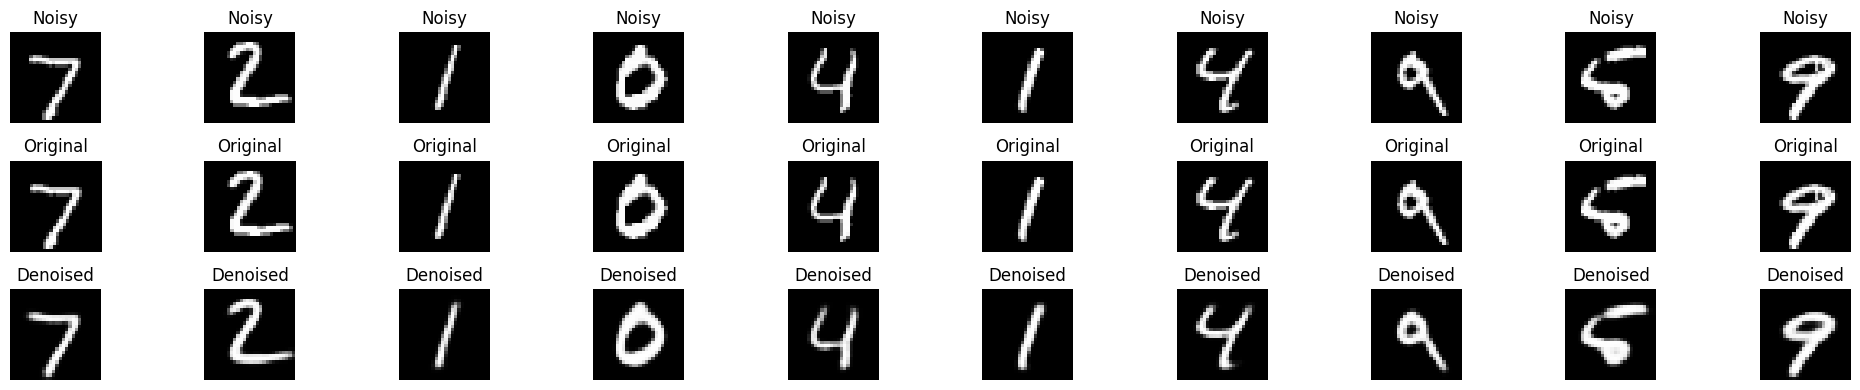

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test, 0., 1.)

input_img = Input(shape=(28,28,1))

x=Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x= MaxPooling2D((2,2), padding='same')(x)
x=Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

decoded_imgs = autoencoder.predict(x_test_noisy)
decoded_imgs = np.clip(decoded_imgs, 0., 1.)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # original
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.tight_layout()
plt.show()



